In [1]:
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])

0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [3]:
df = pd.read_csv('../datasets/penguins_clean.csv')
print(f"Total de registros: {len(df)}")
df.head()

Total de registros: 333


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
categorical = ['island', 'sex']
numerical = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'

print(f"Variables categóricas: {categorical}")
print(f"Variables numéricas: {numerical}")
print(f"Variable objetivo: {target}")

Variables categóricas: ['island', 'sex']
Variables numéricas: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Variable objetivo: species


In [5]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df[target])

print(f"Datos de entrenamiento: {len(df_train)} ({len(df_train)/len(df)*100:.1f}%)")
print(f"Datos de prueba: {len(df_test)} ({len(df_test)/len(df)*100:.1f}%)")

y_train = df_train[target].values
y_test = df_test[target].values

print(f"\nDistribución en entrenamiento:\n{pd.Series(y_train).value_counts()}")
print(f"\nDistribución en prueba:\n{pd.Series(y_test).value_counts()}")

Datos de entrenamiento: 266 (79.9%)
Datos de prueba: 67 (20.1%)

Distribución en entrenamiento:
Adelie       117
Gentoo        95
Chinstrap     54
Name: count, dtype: int64

Distribución en prueba:
Adelie       29
Gentoo       24
Chinstrap    14
Name: count, dtype: int64


In [6]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
test_dict = df_test[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train_encoded = dv.transform(train_dict)
X_test_encoded = dv.transform(test_dict)

print(f"Forma de X_train después de codificación: {X_train_encoded.shape}")
print(f"Características generadas: {dv.get_feature_names_out()}")

Forma de X_train después de codificación: (266, 9)
Características generadas: ['bill_depth_mm' 'bill_length_mm' 'body_mass_g' 'flipper_length_mm'
 'island=Biscoe' 'island=Dream' 'island=Torgersen' 'sex=Female' 'sex=Male']


In [7]:
scaler = StandardScaler()
scaler.fit(X_train_encoded)

X_train = scaler.transform(X_train_encoded)
X_test = scaler.transform(X_test_encoded)

print(f"Media después de normalización: {X_train.mean(axis=0)}")
print(f"Desviación típica después de normalización: {X_train.std(axis=0)}")

Media después de normalización: [-2.74801067e-15  8.89847928e-16 -5.67632825e-17 -4.92504951e-17
  2.21209851e-17  1.23543615e-16  2.05349522e-16 -4.67462326e-17
 -1.65281322e-16]
Desviación típica después de normalización: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
print("MODELO 1: (Regresió lógica)")

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAccuracy: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lr))

with open('../models/penguin_lr.pkl', 'wb') as f:
    pickle.dump((dv, scaler, model_lr), f)
print("\nModelo guardado en: models/penguin_lr.pkl")

MODELO 1: (Regresió lógica)

Accuracy: 0.9851 (98.51%)

Reporte de clasificación:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Modelo guardado en: models/penguin_lr.pkl


In [9]:
print("MODELO 2: (SVM)")

model_svm = SVC(kernel='rbf', random_state=42, probability=True)
model_svm.fit(X_train, y_train)

# Predicciones
y_pred_svm = model_svm.predict(X_test)

# Evaluación
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nAccuracy: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_svm))

# Guardar modelo
with open('../models/penguin_svm.pkl', 'wb') as f:
    pickle.dump((dv, scaler, model_svm), f)
print("\nModelo guardado en: models/penguin_svm.pkl")

MODELO 2: (SVM)

Accuracy: 0.9851 (98.51%)

Reporte de clasificación:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Modelo guardado en: models/penguin_svm.pkl


In [10]:
print("MODELO 3: Arbre decisións")

model_dt = DecisionTreeClassifier(random_state=42, max_depth=5)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy: {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_dt))

with open('../models/penguin_dt.pkl', 'wb') as f:
    pickle.dump((dv, scaler, model_dt), f)
print("\nModelo guardado en: models/penguin_dt.pkl")

MODELO 3: Arbre decisións

Accuracy: 0.9254 (92.54%)

Reporte de clasificación:
              precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67


Modelo guardado en: models/penguin_dt.pkl


In [12]:
print("MODELO 4: K-NEAREST NEIGHBORS (KNN)")

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy: {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_knn))

with open('../models/penguin_knn.pkl', 'wb') as f:
    pickle.dump((dv, scaler, model_knn), f)
print("\nModelo guardado en: models/penguin_knn.pkl")

MODELO 4: K-NEAREST NEIGHBORS (KNN)

Accuracy: 0.9851 (98.51%)

Reporte de clasificación:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Modelo guardado en: models/penguin_knn.pkl


COMPARACIÓ DE MODELOS
                Modelo  Accuracy
0  Regresión Logística  0.985075
1                  SVM  0.985075
3                  KNN  0.985075
2    Árbol de Decisión  0.925373


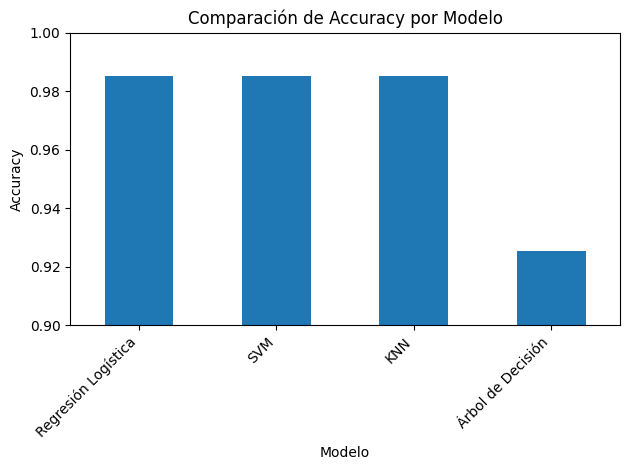

In [13]:
print("COMPARACIÓ DE MODELOS")

resultados = {
    'Modelo': ['Regresión Logística', 'SVM', 'Árbol de Decisión', 'KNN'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_dt, accuracy_knn]
}

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('Accuracy', ascending=False)
print(df_resultados)

df_resultados.plot(x='Modelo', y='Accuracy', kind='bar', legend=False)
plt.title('Comparación de Accuracy por Modelo')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1.0)
plt.tight_layout()
plt.show()